# Data Telco Customer Churn

CREATED BY: AQILAH AINI ZAHRA

1. Permasalahan bisnis yang dihadapi
2. Tujuan yang ingin dicapai
3. Analytic Approach yang dilakukan ( regresi / klasifikasi)
4. Evaluation metric yang difokuskan
5. Metode Preprocessing
6. Penjelasan Cara Kerja algoritme
7. Kesimpulan dan rekomendasi terkait proyek yang sudah diselesaikan

## Business Problem Understanding

**Context**  
Sebuah perusahaan yang bergerak di bidang Telekomunikasi ingin mencari tahu seberapa besar prediksi customer churn atau tingkat pelanggan berhenti berlangganan pada layanan telekomunikasi perusahaan tersebut. Hal ini diperlukan untuk dapat membuat strategi bagaimana mempertahankan customer secara efektif dan efisien berdasarkan data-data yang sudah ada. 

Target :

No (0) : Tidak berhenti berlangganan

Yes (1) : Berhenti berlangganan/Churn

**Problem Statement :**

Proses mendapatkan customer baru lebih mahal bila dibandingkan dengan mempertahankan customer yang sudah ada. Oleh karena itu memprediksi customer churn khususnya pada perusahaan telekomunikasi sangat penting dilakukan oleh perusahaan. Salah satunya dengan menggunakan model machine learning. Model ini akan mengeluarkan daftar customer yang rentan untuk churn, sehingga program retention dapat diprioritaskan untuk mereka. Tentu saja hal ini akan menghemat waktu dan biaya.

**Goals :**
Berdasarkan permasalahaan di atas, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seseorang akan melakukan churn atau tidak pada layanan telekomunikasi mereka. Dari hasil yang didapatkan perusahaan dapat mengetahui siapa saja orang yang rentan untuk melakukan churn dan mengetahui variabel apa yang membuat mereka melakukan churn atau berhenti berlangganan layanan telekomunikasi. 
Tujuannya untuk mengurangi tingkat churn, dan sebagai konsekuensinya meningkatkan kepuasan pengguna dan penghasilan perusahaan.

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan kandidat yang akan berhenti berlangganan atau churn.
Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang kandidat akan melakukan churn atau tidak.
Pada data terdapat tiga karakteristik: 
   1. informasi demografi : Dependents
   2. informasi akun : Tenure, Contract, Paperless Billing, Monthlycharges
   3. informasi layanan : Internet Service, OnlineSecurity, OnlineBackup, Device Protection, TechSupport
   
**Metric Evaluation**

Type I Error: False Positive
Konsekuensi: Perusahaan memperkirakan layanan berhenti padahal customer tidak berhenti berlangganan. Konsekuensinya customer akan kehilangan offer menarik dari perusahaan.

Type II Error: False Negative
Perusahaan memperkirakan customer loyal padahal akan churn.
Konsekuensi: Perusahaan tidak akan terlalu kehilangan banyak uang ketika memberikan penawaran menarik atau diskon pada customer yang setia. Namun demikian, perusahaan akan kehilangan banyak uang ketika customer menghilang dan harus mengakuisisi customer yang lain. Sudah standar di perusahaan bahwa biaya mempertahankan customer (customer retention) lebih sedikit dibandingkan mengakuisisi customer. 
Oleh karena itu, metric yang akan kita fokuskan adalah **recall**.

Recall = TP/TP+FN

Recall memberikan ukuran proporsi customer churn yang berhasil kita temukan/prediksikan. Sehingga semakin sedikit False Negative yang kita miliki, maka akan lebih tinggi nilai Recall kita. 

## Data Understanding

Dataset source: https://drive.google.com/file/d/1oB5uKtJr7dWcWr9Ld5ZFAuVkpV005ceH/view 

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Dependents | Object | Apakah klien memiliki tanggungan atau tidak |
| tenure | int64 | Lama bulan customer bertahan untuk berlangganan di perusahaan |
| OnlineSecurity | Object | Apakah klien memiliki keamanan online atau tidak |
| OnlineBackup | Object | Apakah klien memiliki backup online atau tidak |
| InternetService | Object | Apakah klien berlangganan dengan layanan internet atau tidak |
| DeviceProtection | Object | Apakah klien memiliki perlindungan terhadap perangkat atau tidak |
| TechSupport | Object | Apakah klien memiliki techsupport atau tidak |
| Contract | Object | Tipe kontrak klien/customer |
| PaperlessBilling | Object | Mengindikasikan apakah customer memiliki penagihan tanpa kertas atau tidak |
| MonthlyCharges | float64 | Jumlah tagihan bulanan customer |
| Churn | Object | Apakah customer berhenti berlangganan(churn) atau tidak |

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.express as px

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
import math
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Model Selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
#Load Dataset
df = pd.read_csv("data_telco_customer_churn.csv")
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [3]:
df['Churn'].value_counts()

No     3614
Yes    1316
Name: Churn, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


## Data Cleaning

Dari info di atas, diketahui bahwa tidak ada data yang hilang. Namun demikian, perlu diketahui bahwa banyak data yang masuk merupakan data binary atau trenary. Yakni berisi dua atau tiga value. Ini penting untuk dianalisis kembali. Kemudian terdapat beberapa kolom yang tidak penting untuk dianalisis. Kolom ini akan dicleansing hingga datanya menjadi siap pakai untuk melakukan analisa dan pembuatan machine learningnya.

In [5]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[35, 39]"
2,OnlineSecurity,object,0,0.0,3,"[No, Yes]"
3,OnlineBackup,object,0,0.0,3,"[Yes, No]"
4,InternetService,object,0,0.0,3,"[No, DSL]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No internet service]"
6,TechSupport,object,0,0.0,3,"[No, No internet service]"
7,Contract,object,0,0.0,3,"[Two year, One year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[110.2, 61.65]"


In [7]:
df.OnlineSecurity.value_counts()

No                     2445
Yes                    1433
No internet service    1052
Name: OnlineSecurity, dtype: int64

In [8]:
df.dropna().describe(include=['O'])

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


In [9]:
df['Churn'] = np.where(df['Churn']=='Yes',1,0)

In [10]:
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,0
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,0
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,0
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,0
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,1


In [11]:
df[df['tenure'] < 1]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
82,Yes,0,No,Yes,DSL,Yes,Yes,Two year,No,73.35,0
325,Yes,0,Yes,No,DSL,Yes,Yes,Two year,Yes,52.55,0
1053,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.35,0
2017,Yes,0,Yes,Yes,DSL,Yes,No,Two year,No,80.85,0
2902,Yes,0,Yes,Yes,DSL,No,Yes,Two year,Yes,61.90,0
3410,Yes,0,Yes,Yes,DSL,Yes,Yes,Two year,No,56.05,0
4192,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.25,0
4441,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.85,0


Observasi ini menunjukkan bahwa ada data yang memiliki tenure 0 sedangkan MonthlyCharges ada nilainya. Informasi ini menjadi informasi yang kontrakdiktori sehingga data ini akan dihapus.

In [12]:
df = df[df['tenure'] >= 1]

In [13]:
df.shape

(4922, 11)

### Explanatory Data Analysis and Its Analysis

Text(0.5, 1.0, 'Churn Rate on Overall Data')

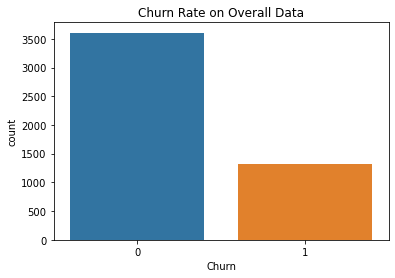

In [14]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Rate on Overall Data")

In [15]:
100*df['Churn'].value_counts()/len(df['Churn'])

0    73.262901
1    26.737099
Name: Churn, dtype: float64

Dari data diketahui bahwa jumlah Churn kurang lebih adalah sepertiga dari jumlah customer yang tetap bertahan. Atau dapat diparafrasekan bahwa 26% konsumer akan melakukan churn terhadap perusahaan.

Text(0.5, 1.0, 'Boxplot Churn vs MonthlyCharges')

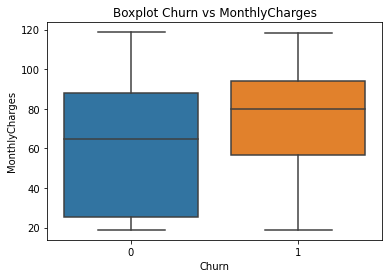

In [16]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Boxplot Churn vs MonthlyCharges")

Berdasarkan data boxplot di Q1 dan Q3, diketahui bahwa kebanyakan customer yang churn adalah yang memiliki tagihan bulanan lebih dari 56 dollar hingga 94 dollar. Sebaliknya, yang tidak berpotensi churn memiliki tagihan bulanan antara 25 dollar hingga 88 dollar. Hal ini menunjukkan bahwa tagihan lebih tinggi rentan meningkatkan potensi churn pada customer

Text(0.5, 1.0, 'Distribution of MonthlyCharges vs Contract type seperated by Churn.')

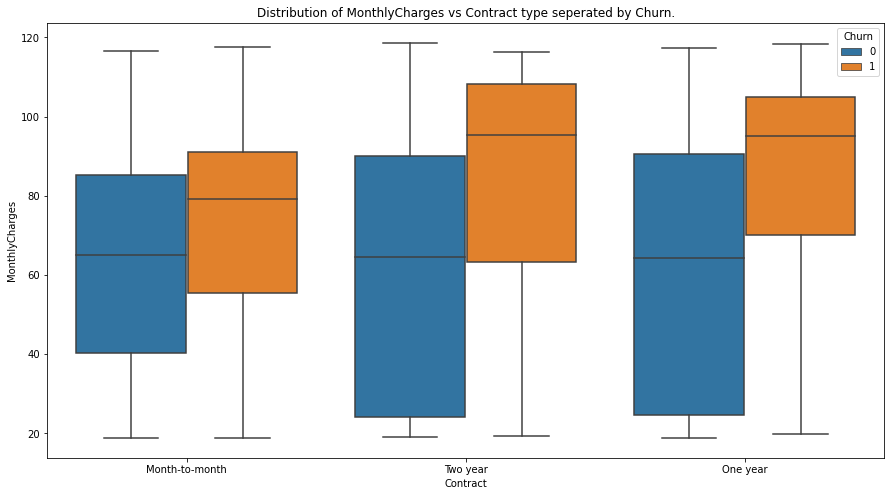

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Contract", y="MonthlyCharges", hue='Churn', data=df)
plt.title("Distribution of MonthlyCharges vs Contract type seperated by Churn.")

Berdasarkan boxplot Distribution of MonthlyCharges vs Contract type seperated by Churn, customer yang memiliki kontrak lebih lama dan juga membayar lebih tinggi akan cenderung churn. Hal ini bisa dikurangi dengan tambahan offering khusus saat kontrak sudah selesai.

Text(0.5, 1.0, 'Dependents Category vs Number of Churn')

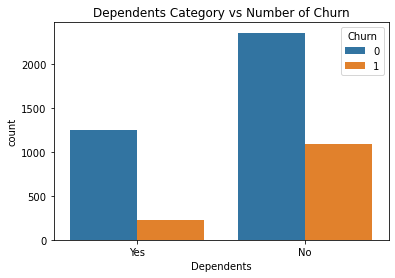

In [18]:
sns.countplot('Dependents', hue='Churn', data=df)
plt.title("Dependents Category vs Number of Churn")

Berdasarkan Barplot, orang yang tidak memiliki tanggungan memiliki jumlah retention lebih tinggi dibandingkan yang memiliki tanggungan. Namun demikian, jumlah churn nya pun juga tinggi untuk orang yang tidak memiliki tanggungan. Untuk selanjutnya, perusahaan dapat memberikan diskon yang menarik untuk mempertahankan langganan orang yang tidak memiliki tanggungan untuk tetap berlangganan pada produk perusahaan.

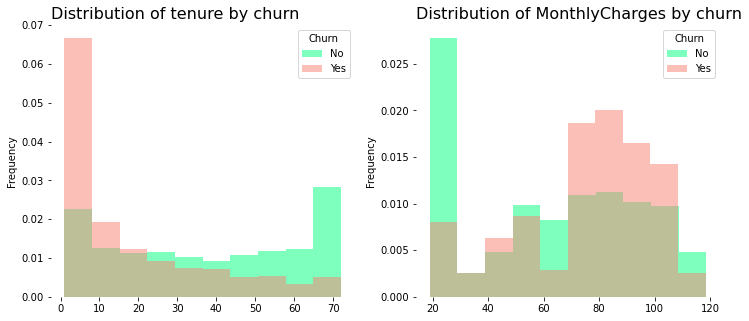

In [19]:
def histogram_plots(columns_to_plot):
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
 

    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df[df['Churn']==0][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='springgreen', label='No')
        df[df['Churn']==1][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='salmon', label='Yes')
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric)

Terdapat dua insight dari grafik di atas. Customer baru ( tenure yang lebih rendah) cenderung untuk melakukan churn. Sedangkan bila tagihan bulanannya diantara 80-100, customer akan melakukan churn. Berbeda dengan yang memiliki tagihan rendah, maka tidak berpotensi melakukan churn.

In [20]:
def percentage_stacked_plot(columns_to_plot):
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,rot=0, color=['green','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

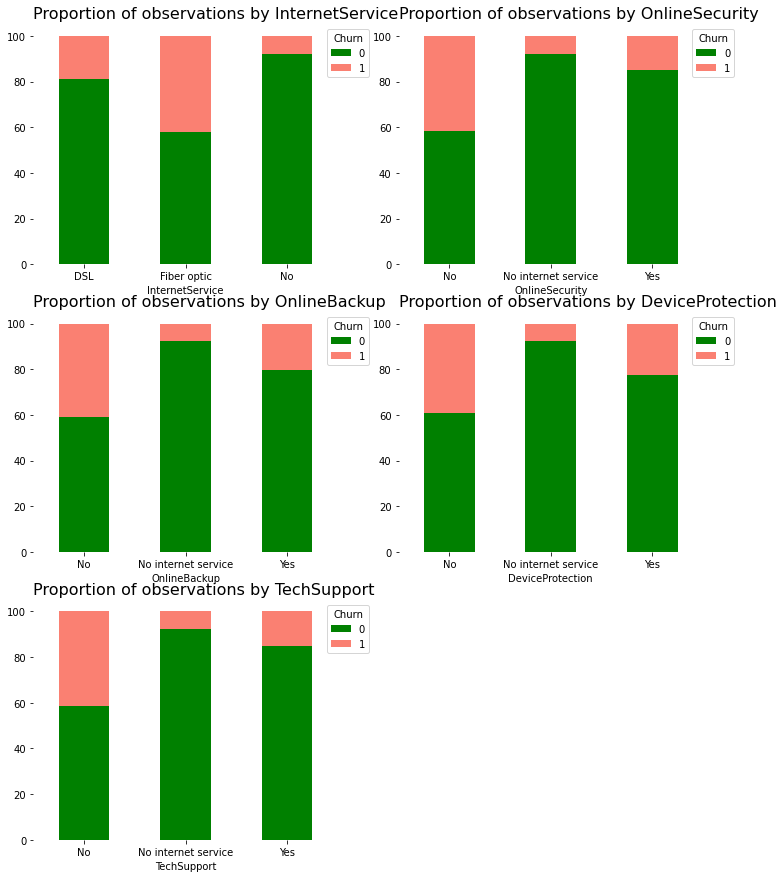

In [21]:
services_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# stacked plot of services columns
percentage_stacked_plot(services_columns)

- Pengguna Fiber Optic cenderung melakukan churn dibanding service lainnya.
- Pengguna yang tidak memiliki fasilitas Online Security cenderung melakukan churn
- Pengguna yang tidak memiliki online Backup cenderung melakukan churn. 
- Pengguna yang tidak memiliki proteksi perangkat cenderung melakukan churn 
 Pengguna yang tidak memiliki dukungan TechSupport cenderung melakukan churn

*Rangkuman Analisis*:
  1. Diketahui bahwa jumlah `Churn` kurang lebih sepertiga dari jumlah customer yang bertahan.
  2. Berdasarkan data boxplot di Q1 dan Q3, diketahui bahwa kebanyakan customer yang churn adalah yang memiliki tagihan bulanan lebih dari 56 dollar hingga 94 dollar. Sebaliknya, yang tidak berpotensi churn memiliki tagihan bulanan antara 25 dollar hingga 88 dollar. Hal ini menunjukkan bahwa tagihan lebih tinggi rentan meningkatkan potensi churn pada customer
  3. Berdasarkan boxplot Distribution of MonthlyCharges vs Contract type seperated by Churn, customer yang memiliki kontrak lebih lama dan juga membayar lebih tinggi akan cenderung churn. Hal ini bisa dikurangi dengan tambahan offering khusus saat kontrak sudah selesai.
  4. Berdasarkan Barplot, orang yang tidak memiliki tanggungan memiliki jumlah retention lebih tinggi dibandingkan yang memiliki tanggungan. Namun demikian, jumlah churn nya pun juga tinggi untuk orang yang tidak memiliki tanggungan. Untuk selanjutnya, perusahaan dapat memberikan diskon yang menarik untuk mempertahankan langganan orang yang tidak memiliki tanggungan untuk tetap berlangganan pada produk perusahaan.
  5. Terdapat dua insight dari grafik di atas. Customer baru ( tenure yang lebih rendah) cenderung untuk melakukan churn. Sedangkan bila tagihan bulanannya diantara 80-100, customer akan melakukan churn. Berbeda dengan yang memiliki tagihan rendah, maka tidak berpotensi melakukan churn.
  6. Pengguna Fiber Optic cenderung melakukan churn dibanding service lainnya.
  7. Pengguna yang tidak memiliki fasilitas Online Security cenderung melakukan churn
  8. Pengguna yang tidak memiliki online Backup cenderung melakukan churn.
  9. Pengguna yang tidak memiliki proteksi perangkat cenderung melakukan churn Pengguna yang tidak memiliki dukungan TechSupport cenderung melakukan churn

## Feature Engineering

**NO MODIFICATION**

Kolom Churn sudah termasuk ke kolom biner sehingga tidak perlu dilakukan Encoding lagi

**LABEL ENCODING**

Label encoding digunakan untuk mengubah nilai kategori menjadi nilai numerik. Pada tugas kali ini, akan kita lakukan label encoding pada variabel `Dependents` dan juga `Paperless Billing`

In [22]:
df_telco_transformed = df.copy()

# label encoding (binary variables)
label_encoding_columns = [ 'Dependents', 'PaperlessBilling']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
        df_telco_transformed[column] = df_telco_transformed[column].map({'Yes': 1, 'No': 0}) 

**ONE HOT ENCODING**

One-hot encoding membuat kolom biner baru untuk tiap level pada variabel kategorikal. Kolom baru akan mengandung nilai 0 dan 1 untuk mengidentifikasikan ada atau tidaknya data dalam category. Pada project ini kita akan melakukan one hot encoding pada variabel :  (1) `Contract`, (2) `InternetServices`, (3) `OnlineSecurity`, (4) `OnlineBackup`, (5) `DeviceProtection`, (6) `TechSupport`, (7)`OnlineSecurity`


In [23]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Contract','InternetService', 'OnlineBackup', 'DeviceProtection', 
                                             'TechSupport','OnlineSecurity'])
], remainder='passthrough')

**DATA NORMALIZATION**

Data normalization penting untuk mengubah skala data menjadi ukuran skala yang sama dengan data-data lainnya. Sehingga mengurangi bias dalam pemodelan machine learning. Hal ini dikarenakan nilai yang lebih besar akan mendominasi dalam proses pembelajaran machine learning. Oleh karena itu perlu dilakukan data normalization. Ada banyak teknik normalisasi dalam statistika. Pada projek ini kita akan menggunakan Min-max approach untuk merescale kolom `tenure` dan juga kolom `MonthlyCharges`

In [24]:
min_max_columns = ['tenure', 'MonthlyCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_telco_transformed[column].min()
        # maximum value of the column
        max_column = df_telco_transformed[column].max()
        # min max scaler
        df_telco_transformed[column] = (df_telco_transformed[column] - min_column) / (max_column - min_column)   


## DATA PREPARATION

SPLIT X AND Y

In [25]:
x = df_telco_transformed.drop(columns=['Churn'])
y = df_telco_transformed['Churn']

**SPLIT THE DATA INTO TRAINING AND TEST SETS**

Langkah berikutnya adalah membagi data menjadi 2 kelompok, yakni data latih dan data testing. Data training digunakan oleh model machine learning untuk membuat model. Sedangkan data tes berisi sampel yang bukan merupakan bagian dari proses pembelajaran dan hanya digunakan untuk mengukur performa model. 

In [26]:
x_train,x_test,y_train,y_test=train_test_split(
                                            x,
                                            y,
                                            stratify=y,
                                            test_size=0.2,
                                            random_state=2022)

In [27]:
X_train_preprocessed = transformer.fit_transform(x_train)
X_test_preprocessed = transformer.transform(x_test)

In [28]:
testing = pd.DataFrame(X_train_preprocessed,columns=transformer.get_feature_names())
testing.head()

,onehot__x0_One year,onehot__x0_Two year,onehot__x1_Fiber optic,onehot__x1_No,onehot__x2_No internet service,onehot__x2_Yes,onehot__x3_No internet service,onehot__x3_Yes,onehot__x4_No internet service,onehot__x4_Yes,onehot__x5_No internet service,onehot__x5_Yes,Dependents,tenure,PaperlessBilling,MonthlyCharges
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.661972,0.0,0.111167
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.577465,1.0,0.597396
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.492958,0.0,0.122684
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.000000,1.0,0.649975
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.774648,1.0,0.744617


Sekarang data sudah siap dan akan dilanjutkan dengan melakukan pemodelan machine learning dan evaluasi

## Modeling and Evaluation

Pemodelan akan menggunakan
  1. Logistic Regression
  2. Decision Tree
  3. KNN
  4. Random Forest
  5. Adaboost
  6. Extreme Gradient Boosting
  
Metode Evaluasi yang akan digunakan :
  - Cross Validation
  - Mean Score
  - Standard Deviasi Score
  - Recall Score

In [29]:
logreg_pipe = LogisticRegression()
tree_pipe = DecisionTreeClassifier(random_state = 2022)
knn_pipe = KNeighborsClassifier()
rf_pipe = RandomForestClassifier(random_state = 2022)
ada_pipe = AdaBoostClassifier(random_state = 2022)
xgb_pipe = XGBClassifier(random_state = 2022)

In [30]:
def model_evaluation(model, metric):
    model_cv = cross_val_score(model, X_train_preprocessed, y_train, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

logreg_pipe_cv = model_evaluation(logreg_pipe, 'recall')
tree_pipe_cv = model_evaluation(tree_pipe, 'recall')
knn_pipe_cv = model_evaluation(knn_pipe, 'recall')
rf_pipe_cv = model_evaluation(rf_pipe, 'recall')
ada_pipe_cv = model_evaluation(ada_pipe, 'recall')
xgb_pipe_cv = model_evaluation(xgb_pipe, 'recall')

for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe, ada_pipe, xgb_pipe]:
    model.fit(X_train_preprocessed, y_train)

score_cv = [logreg_pipe_cv.round(5), tree_pipe_cv.round(5), knn_pipe_cv.round(5),
            rf_pipe_cv.round(5), ada_pipe_cv.round(5), xgb_pipe_cv.round(5)]
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean(), rf_pipe_cv.mean(),
              ada_pipe_cv.mean(), xgb_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std(), rf_pipe_cv.std(),
             ada_pipe_cv.std(), xgb_pipe_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe.predict(X_test_preprocessed)),
            recall_score(y_test, tree_pipe.predict(X_test_preprocessed)), 
            recall_score(y_test, knn_pipe.predict(X_test_preprocessed)), 
            recall_score(y_test, rf_pipe.predict(X_test_preprocessed)),
            recall_score(y_test, ada_pipe.predict(X_test_preprocessed)),
            recall_score(y_test, xgb_pipe.predict(X_test_preprocessed))]
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier',
               'Ada Boost Classifier', 'XGB Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'cv score': score_cv,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_summary

[20:15:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,method,cv score,mean score,std score,recall score
0,Logistic Regression,"[0.54028, 0.51185, 0.5381, 0.55238, 0.51185]",0.530891,0.016292,0.574144
1,Decision Tree Classifier,"[0.49763, 0.46919, 0.50476, 0.55714, 0.56398]",0.518542,0.036379,0.570342
2,KNN Classifier,"[0.48815, 0.4455, 0.51429, 0.53333, 0.46919]",0.490093,0.031255,0.517110
3,Random Forest Classifier,"[0.49289, 0.46919, 0.44762, 0.50952, 0.48341]",0.480528,0.021040,0.520913
4,Ada Boost Classifier,"[0.54976, 0.49289, 0.50952, 0.56667, 0.46445]",0.516660,0.037250,0.539924
5,XGB Classifier,"[0.51185, 0.47867, 0.50952, 0.54286, 0.54976]",0.518533,0.025619,0.539924


Dari data diatas diketahui bahwa model memiliki performa yang buruk karena hanya mampu menangkap sebesar 50% rerata validasi akurat. Oleh karena itu akan dilakukan metode selanjutnya yakni Oversampling menggunakan Random Oversampler dan SMOTE

## Random Oversampler

In [31]:
ros = RandomOverSampler(random_state = 2727)
X_over, y_over = ros.fit_resample(X_train_preprocessed, y_train)

In [32]:
logreg_pipe_scale_over = Pipeline([
    ('ros', ros), 
    ('logreg', logreg_pipe)
])

tree_pipe_scale_over = Pipeline([
    ('ros', ros), 
    ('tree', tree_pipe)
])

knn_pipe_scale_over = Pipeline([
    ('ros', ros), 
    ('knn', knn_pipe)
])

rf_pipe_scale_over = Pipeline([
    ('ros', ros),
    ('rf', rf_pipe)
])
ada_pipe_scale_over = Pipeline([
    ('ros', ros),
    ('ada',ada_pipe)
])
xgb_pipe_scale_over = Pipeline([
    ('ros', ros),
    ('xgb',xgb_pipe)
])

In [33]:
def model_evaluation2(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_over, y_over, cv = skfold, scoring = metric)
    return model_cv

In [34]:
logreg_scale_over_cv = model_evaluation2(logreg_pipe_scale_over, 'recall') 
tree_scale_over_cv = model_evaluation2(tree_pipe_scale_over, 'recall')
knn_pipe_over_cv = model_evaluation2(knn_pipe_scale_over, 'recall')
rf_pipe_over_cv = model_evaluation2(rf_pipe_scale_over, 'recall')
ada_pipe_over_cv = model_evaluation2(ada_pipe_scale_over, 'recall')
xgb_pipe_over_cv = model_evaluation2(xgb_pipe_scale_over, 'recall')

[20:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [35]:
for model2 in [logreg_pipe_scale_over, tree_pipe_scale_over, knn_pipe_scale_over, rf_pipe_scale_over,ada_pipe_scale_over,xgb_pipe_scale_over]:
    model2.fit(X_train_preprocessed, y_train)

[20:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
score_cv = [logreg_scale_over_cv.round(5), tree_scale_over_cv.round(5), knn_pipe_over_cv.round(5),
            rf_pipe_over_cv.round(5), ada_pipe_over_cv.round(5), xgb_pipe_over_cv.round(5)]
score_mean = [logreg_scale_over_cv.mean(), tree_scale_over_cv.mean(), knn_pipe_over_cv.mean(), rf_pipe_over_cv.mean(),
              ada_pipe_over_cv.mean(), xgb_pipe_over_cv.mean()]
score_std = [logreg_scale_over_cv.std(), tree_scale_over_cv.std(), knn_pipe_over_cv.std(), rf_pipe_over_cv.std(),
             ada_pipe_over_cv.std(), xgb_pipe_over_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe_scale_over.predict(X_test_preprocessed)),
            recall_score(y_test, tree_pipe_scale_over.predict(X_test_preprocessed)), 
            recall_score(y_test, knn_pipe_scale_over.predict(X_test_preprocessed)), 
            recall_score(y_test, rf_pipe_scale_over.predict(X_test_preprocessed)),
            recall_score(y_test, ada_pipe_scale_over.predict(X_test_preprocessed)),
            recall_score(y_test, xgb_pipe_scale_over.predict(X_test_preprocessed))]
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier',
               'Ada Boost Classifier', 'XGB Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'cv score': score_cv,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score,
})
cv_summary

,method,cv score,mean score,std score,recall score
0,Logistic Regression,"[0.81109, 0.79896, 0.7851, 0.79514, 0.81456]",0.800969,0.010744,0.790875
1,Decision Tree Classifier,"[0.91334, 0.90641, 0.9948, 0.99306, 0.99307]",0.960136,0.041099,0.532319
2,KNN Classifier,"[0.84055, 0.80936, 0.87522, 0.86806, 0.84402]",0.847441,0.023263,0.726236
3,Random Forest Classifier,"[0.93588, 0.92894, 0.9948, 0.99653, 0.9948]",0.970189,0.030932,0.623574
4,Ada Boost Classifier,"[0.81109, 0.80936, 0.80936, 0.8125, 0.81282]",0.811027,0.001481,0.847909
5,XGB Classifier,"[0.90815, 0.89601, 0.95494, 0.93576, 0.9688]",0.932733,0.027409,0.673004


Terlihat bahwa setelah dilakukan oversampling, mean scorenya meningkat tajam mencapai 97% dengan cross validation yang seimbang. Namun demikian memiliki recall yang rendah

## SMOTE

In [37]:
smote = SMOTE(random_state = 2727)

In [38]:
logreg_pipe_scale_smote = Pipeline([
    ('smote', smote),
    ('logreg', logreg_pipe)
])

tree_pipe_scale_smote = Pipeline([
    ('smote', smote),
    ('tree', tree_pipe)
])

knn_pipe_scale_smote = Pipeline([
    ('smote', smote),
    ('knn', knn_pipe)
])

rf_pipe_scale_smote = Pipeline([
    ('smote', smote),
    ('rf', rf_pipe)
])
ada_pipe_scale_smote = Pipeline([
     ('smote', smote),
    ('ada',ada_pipe)
])
xgb_pipe_scale_smote = Pipeline([
     ('smote', smote),
    ('xgb',xgb_pipe)
])

In [39]:
logreg_scale_smote_cv = model_evaluation2(logreg_pipe_scale_smote, 'recall') 
tree_scale_smote_cv = model_evaluation2(tree_pipe_scale_smote, 'recall')
knn_pipe_smote_cv = model_evaluation2(knn_pipe_scale_smote, 'recall')
rf_pipe_smote_cv = model_evaluation2(rf_pipe_scale_smote, 'recall')
ada_pipe_smote_cv = model_evaluation2(ada_pipe_scale_smote, 'recall')
xgb_pipe_smote_cv = model_evaluation2(xgb_pipe_scale_smote, 'recall')

[20:15:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [40]:
for model2 in [logreg_pipe_scale_smote, tree_pipe_scale_smote, knn_pipe_scale_smote, rf_pipe_scale_smote,ada_pipe_scale_smote,xgb_pipe_scale_smote]:
    model2.fit(X_train_preprocessed, y_train)

[20:15:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
score_cv = [logreg_scale_smote_cv.round(5), tree_scale_smote_cv.round(5), knn_pipe_smote_cv.round(5),
            rf_pipe_smote_cv.round(5), ada_pipe_smote_cv.round(5), xgb_pipe_smote_cv.round(5)]
score_mean = [logreg_scale_smote_cv.mean(), tree_scale_smote_cv.mean(), knn_pipe_smote_cv.mean(),
              rf_pipe_smote_cv.mean(),ada_pipe_over_cv.mean(),xgb_pipe_over_cv.mean() ]
score_std = [logreg_scale_smote_cv.std(), tree_scale_smote_cv.std(), knn_pipe_smote_cv.std(),
             rf_pipe_smote_cv.std(),ada_pipe_over_cv.std(),xgb_pipe_over_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe_scale_smote.predict(X_test_preprocessed)),
            recall_score(y_test, tree_pipe_scale_smote.predict(X_test_preprocessed)), 
            recall_score(y_test, knn_pipe_scale_smote.predict(X_test_preprocessed)), 
            recall_score(y_test, rf_pipe_scale_smote.predict(X_test_preprocessed)),
            recall_score(y_test, ada_pipe_scale_smote.predict(X_test_preprocessed)),
            recall_score(y_test, xgb_pipe_scale_smote.predict(X_test_preprocessed))]


method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier',
               'Ada Boost Classifier', 'XGB Classifier']
smote_summary = pd.DataFrame({
    'method': method_name,
    'cv score': score_cv,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
smote_summary

,method,cv score,mean score,std score,recall score
0,Logistic Regression,"[0.81109, 0.79896, 0.7851, 0.79514, 0.81456]",0.800969,0.010744,0.783270
1,Decision Tree Classifier,"[0.91334, 0.90641, 0.9948, 0.99306, 0.99307]",0.960136,0.041099,0.623574
2,KNN Classifier,"[0.84055, 0.80936, 0.87522, 0.86806, 0.84402]",0.847441,0.023263,0.711027
3,Random Forest Classifier,"[0.93588, 0.92894, 0.9948, 0.99653, 0.9948]",0.970189,0.030932,0.634981
4,Ada Boost Classifier,"[0.81109, 0.80936, 0.80936, 0.80208, 0.82322]",0.811027,0.001481,0.825095
5,XGB Classifier,"[0.90815, 0.89601, 0.95494, 0.94097, 0.96014]",0.932733,0.027409,0.673004


KESIMPULAN AWAL

Diketahui dari dua metode diatas, **Ada Boost Classifier** dengan metode **Random Oversampler** yang akan dipilih. Hal ini dikarenakan ia memiliki skor akurasi 81%, standar deviasi yang rendah 0,1 % dan juga memiliki nilai recall score (yang menjadi fokus utama evaluasi) lebih tinggi dari nilai metode klasifikasi lainnya yaitu 84%. Maka akan dipilih metode ini untuk dilanjutkan pada HyperParameter Tuning.

Adaboost Classifier adalah salah satu metode ensemble yang bekerja untuk meningkatkan efisiensi pada klasifikasi biner pada awalnya. Kemudian melakukan pendekatan iteratif untuk belajar dari kesalahan dari weak classifier dan merubahnya menjadi strong classifier. Random State ditetapkan supaya nilainya tidak berubah

In [42]:
ada_pipe = AdaBoostClassifier(random_state=2022)

In [43]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ada_pipe, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall')

In [44]:
#kita menggunakan nilai x dan y yang telah dilakukan oversampling sehingga menggunakan variabel X_over dan y_over 
grid_result = grid_search.fit(X_over, y_over)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.979197 using {'learning_rate': 0.0001, 'n_estimators': 10}
0.979197 (0.008150) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.979197 (0.008150) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.979197 (0.008150) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.979197 (0.008150) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.979197 (0.008150) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.979197 (0.008150) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.979197 (0.008150) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.906149 (0.016872) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.979197 (0.008150) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.906149 (0.016872) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.899908 (0.023198) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.824079 (0.027199) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.902794 (0.020356) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.8238

In [45]:
best_model_recall = grid_search.best_estimator_
best_model_recall.fit(X_over, y_over)

AdaBoostClassifier(learning_rate=0.0001, n_estimators=10, random_state=2022)

In [46]:

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ada_pipe, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

In [47]:
#kita menggunakan nilai x dan y yang telah dilakukan oversampling sehingga menggunakan variabel X_over dan y_over 
grid_result = grid_search.fit(X_over, y_over)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.776638 using {'learning_rate': 1.0, 'n_estimators': 500}
0.645456 (0.010425) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.645456 (0.010425) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.645456 (0.010425) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.645456 (0.010425) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.645456 (0.010425) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.645456 (0.010425) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.645456 (0.010425) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.726131 (0.013687) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.645456 (0.010425) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.726131 (0.013687) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.727517 (0.013874) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.764849 (0.018835) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.727171 (0.014039) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.765195

Hyperparameter terbaik hasil dari Gridsearch adalah *learning rate*=1 dan *n_estimator*=500

In [48]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7766376211566854
{'learning_rate': 1.0, 'n_estimators': 500}


In [49]:
best_model = grid_search.best_estimator_
best_model.fit(X_over, y_over)
#RandomOversampler dan Encoding telah dijalankan pada data X_train dan y_train

AdaBoostClassifier(n_estimators=500, random_state=2022)

In [50]:
estimator=Pipeline([
    ('oversampling',ros),
    ('model',ada_pipe)
])
estimator.fit(X_train_preprocessed, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=2727)),
                ('model', AdaBoostClassifier(random_state=2022))])

In [51]:
y_pred_default = estimator.predict(X_test_preprocessed)
y_pred_tuned_accuracy = best_model.predict(X_test_preprocessed)
y_pred_tuned_recall = best_model_recall.predict(X_test_preprocessed)

In [52]:
report_default = classification_report(y_test, y_pred_default)
report_tuned_accuracy = classification_report(y_test, y_pred_tuned_accuracy)
report_tuned_recall = classification_report(y_test, y_pred_tuned_recall)

In [53]:
print('Classification Report Default Adaboost : \n', report_default)
print('Classification Report Tuned Accuracy Adaboost : \n', report_tuned_accuracy)
print('Classification Report Tuned Recall Adaboost : \n', report_tuned_recall)

Classification Report Default Adaboost : 
               precision    recall  f1-score   support

           0       0.93      0.70      0.80       722
           1       0.51      0.85      0.64       263

    accuracy                           0.74       985
   macro avg       0.72      0.77      0.72       985
weighted avg       0.81      0.74      0.75       985

Classification Report Tuned Accuracy Adaboost : 
               precision    recall  f1-score   support

           0       0.91      0.72      0.80       722
           1       0.51      0.81      0.63       263

    accuracy                           0.74       985
   macro avg       0.71      0.77      0.72       985
weighted avg       0.81      0.74      0.76       985

Classification Report Tuned Recall Adaboost : 
               precision    recall  f1-score   support

           0       0.97      0.30      0.46       722
           1       0.34      0.97      0.50       263

    accuracy                           0.

Kembali lagi, terlihat bahwa nilai Default memiliki nilai Recall dan Akurasi lebih tinggi dibandingkan nilai yang telah dilakukan Hyperparameter Tuning secara recall maupun accuracy. Diketahui bahwa pada classification report ke tiga, recall mampu mendeteksi 97% false negative. Tetapi akurasinya sangat rendah, yakni hanya 48%. Hal ini membuat nilai hyperparameter tuning dengan recall tidak layak untuk dijadikan model akhir. Oleh karena itu, kita akan menggunakan nilai default saja sebagai model akhir kita.
Sekali lagi karena yang ditekankan adalah nilai recall maka kita akan memilih model default sebagai model akhir kita.

## Feature Importance

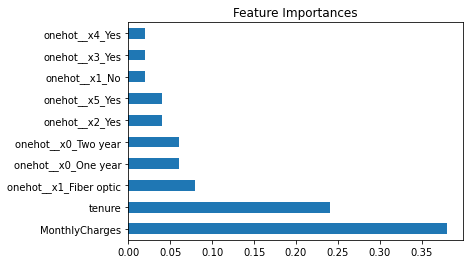

In [54]:
coef1 = pd.Series(estimator['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Tampak dari grafik feature importance diketahui bahwa Biaya Bulanan atau Monthly Charges sangat mempengaruhi produksi hasil klasifikasi kita. Selain itu jumlah bulan berlangganan atau tenure juga mempengaruhi apakah customer akan churn atau tidak.
Sedangkan Paperless Billing dan Dependents tidak terlalu mempengaruhi klasifikasi. Sehingga kedepannya mungkin dapat dihapus.

# Kesimpulan dan Rekomendasi

In [55]:
print('Classification Report Default Adaboost : \n', report_default)

Classification Report Default Adaboost : 
               precision    recall  f1-score   support

           0       0.93      0.70      0.80       722
           1       0.51      0.85      0.64       263

    accuracy                           0.74       985
   macro avg       0.72      0.77      0.72       985
weighted avg       0.81      0.74      0.75       985



Berdasarkan hasil classification report, kita dapat menyimpulkan bahwa bila seandainya nanti kita menggunakan model kita untuk menyaring customer yang akan melakukan churn atau tidak, maka model kita dapat mengurangi 71% customer yang tidak melakukan churn, dan model kita dapat mendapatkan 84% customer yang akan melakukan churn. (semua ini berdasarkan recallnya)

Model kita pun memiliki presisi untuk customer yang tidak melakukan churn sebesar 92%. Dan akurasi keseluruhan 75%. Namun memiliki presisi yang kurang baik untuk customer yang melakukan churn, yakni hanya sebesar 52%.

**Recommendation**

Hal yang bisa dilakukan untuk mengembangkan proyek lebih baik lagi adalah:
  - Menambahkan parameter pada hypertuning parameter sehingga akan didapatkan model lebih baik lagi.
  - Melakukan feature selection untuk mengurangi atau melakukan feature engineering untuk menambah fitur.
  - Membuat kebijakan baru pada tagihan bulanan apabila telah melebihi tenure setahun atau dua tahun akan mendapatkan penawaran khusus.

## Saving File

In [56]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(estimator, open(filename, 'wb'))

In [57]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_preprocessed, y_test)
print(result)

0.7401015228426396


# Sekian dan Terimakasih